# Oceanic Games in PoS Ethereum Staking

In this issue of Beacondigest, in addition to our recurring analysis of network metrics we also aim to analyze startegic considerations in the setting of PoS Ethereum Staking through the concept of Oceanic Games<sup>[1]</sup> . The notion was first put forth by J.W Milnor and L.S Shapely in the year 1978. It has since then been used to study decision making strategies especially in weighted voting systems. The concept was adapted to Blockchain mining by researchers Nikos Leonardos, Stefanos Leonardos and Georgious Piliouras in their paper Oceanic Games: Centralization Risks and Incentives in Blockchain Mining<sup>[2]</sup>

In this notebook we extend this analysis to Eth staking to estimate the values per unit resources for major staking "entities".

The outline of this notebook is as follows:
We start off by presenting the Oceanic Games model and define all relavant terms. We then apply the concepts in the setting of Ethereum staking and present our results. We finally conclude by listing some shortcomings of this notebook and our analysis.

## An Introduction to Oceanic Games

The first question we aim to answer is, what are oceanic games? In the context of corporate governance, they are a class of games that involve large players also known "atomic players" who own a significant portion of the companies total shares and and an *ocean* of "non-atomic" players that each own an infinitesimal portion of the company's total shares. The main focus while analyzing such games is to measure the value of a resource per unit resource.

As seen in a lot of literature <sup>[2][3][4][5]</sup> the *value* of a resource has a lot more to it than just the amount of resource that are in one's possession.

For example, in the context of Blockchain mining: Consider a party having access to 51% of all mining resources vs one having access to 49% of all mining resources. While the difference is only 2%, the possession in the first case is more *valuable* as now the party has complete control over the Blockchain. This can be extended to the case where many miners collude with each other: If a miner has access to 49% of all mining resources and another miner 2%, their combined possession is worth more than in the first miner had access to only 47% of the totalresources. 

Thus the aim of our analysis is to measure the **value of resources** needed for staking on the Beacon Chain **per unit resource** for major staking entities and the ocean of small validators. 

These major staking entities can be thought of as PoS parallels to mining pools in PoW system

## Introducing the Oceanic Games Model

Without going too much into the technical details, here is the overview of the Oceanic Games Model:

- **Stakers**: They refer to the block proposers and validators that take part in the PoS consensus after making their initial deposit of 32Eth. Any set of stakers are made up of two important components:
    - Major Stakers: A *set* of entities that control a significant portion of the Eth staked on the beacon chain 
    - The Ocean: An *interval* of infinitesimal stakers.
    
    
- **Resources**: Refers to the native cryptocurrency (Eth) deposited by stakers to take part in PoS consensus. In our analysis we measure resources in terms of the fraction of staked ether that an entity controls.


- **Majority Quota**: A common notion in weighted voting systems, in our context it refers to the minumum amount resources controlled by a single entity to raise an alert. We assume the quota of our oceanic game is 0.33, as a single entity controlling more than 1/3rd of the resources could mean that they could bring about a great deal of harm to the protocol if they wish to. (ReadL https://www.talentica.com/blogs/why-bft-protocols-cannot-have-13-dishonest-parties/)


- **Values**: Under this current model, we aim to calculate a value for each major staker and the entirety of the ocean. Without going into the mathematical details, we can think of the value of a staker i, v<sub>i</sub> , as the probability that, that staker will be the crucial entity to turn a random coalition of stakers from losing (total resources of the coalition without i are less than q) to winning (total resources of the coalition with i are equal to or greater than q)<sup>[4]<sup>
    

- **Value per unit resource**: As the name suggests, it is simply the value of a staker divided by his resources!

## Analysis

Now for the interesting portion of the notebook, applying the model on Eth PoS consensus! The first step would be to identify the stakers, both the major stakers and the ocean as well as the resources they possess

But the first stage, as always, is data collection. We collect data pertaining to the eth1 deposits made by the first 163400 validators who were activated using beaconcha.in's api. We then identify which entities control large portions of the total Eth staked on the Beacon Chain

In [2]:
#Import all the modules 

import requests
import json
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *

In [ ]:
validator_staking = {}

In [ ]:
with open('api_key.txt', 'r') as api_file:
    api_key = api_file.read()

for i in range(0,163399,100):
    str1 = ''

    for j in range(99):
        str1 = str1 + str(i+j) + ','
    
    str1 = str1 + str(i+99)
    
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/deposits?api_key={}'.format(str1, api_key))
    #Add a sleep to stay within the call rate limits
    sleep(6)
    
    data = x.json()['data']
    
    for t in data:
        if(validator_staking.get(t['from_address']) != None):
            validator_staking[t['from_address']] += t['amount']
        else:
            validator_staking[t['from_address']] = t['amount']

In [ ]:
with open('api_key.txt', 'r') as api_file:
    api_key = api_file.read()
    
x = requests.get('https://beaconcha.in/api/v1/validator/{}/deposits?api_key={}'.format(163400, api_key))
t = x.json()['data']
if(validator_staking.get(t['from_address']) != None):
    validator_staking[t['from_address']] += t['amount']
else:
    validator_staking[t['from_address']] = t['amount']

In [ ]:
# #Writing the dictionaries to csv files

# with open('staking_pools.csv','w') as result_file:
#     wr = csv.writer(result_file, dialect='excel')
#     for key, value in validator_staking.items():
#         wr.writerow([key,value])

In [14]:
df = pd.read_csv('staking_pools.csv', header= None, names = ["address","stake"])
df['percentage_stake'] = (df['stake']/df['stake'].sum())
print(len(df))
print(len(df)/163400)

28934
0.1770746634026928


At this point, we see a very interesting result! When we look into the wallet addresses of the deposit contracts that were used to activate 163400 validators, we notice that only 28934 distint wallet addresses activated these validators. This means that only about **17.7%** of these deposits were made by unique addresses. 

In [22]:
sorted_df = df.sort_values('percentage_stake',ascending=False)
sorted_df.insert(1, 'ID', range(1, 1 + len(df)))
sorted_df = sorted_df[sorted_df.columns[1:4]]
print(sorted_df.head(n=10))
#print(sorted_df.head(n=6))
#print(13.911047+2.176371+1.582760+1.488614+1.223292+1.050894)

       ID            stake  percentage_stake
3345    1  728160000000000          0.139110
5012    2  113920000000000          0.021764
2479    3   82848000000000          0.015828
9722    4   77920000000000          0.014886
1153    5   64032000000000          0.012233
4824    6   55008000000000          0.010509
601     7   48768000000000          0.009317
5870    8   48736000000000          0.009311
4789    9   45120000000000          0.008620
22874  10   44192000000000          0.008443


The above table captures, the 10 wallet addresses arranged in the descending order of the percentage of staked ether they possess. [The addresses have not been displayed for the sake of the privacy of these entities]. We consider the first 6 entities to be atomic players or major stakers since they control more than 1% of all the Eth staked. The remaining ones are considered to be oceanic.

Out of these 6 entities only 2 have public tags to their wallet address from which we can deduce which instituition they represent: The first one that controls 13.9% is, the US Based Crypto based exchange, Kraken and the third largest one that controls about 1.58% of the network belongs to the financial insitution Bitcoin Suisse. 

Using this intial distribution we can now try and estimate the values per unit resource for the 6 major staking entities and the entirety of the ocean. For this, we first used the publicly available [ssocean software](http://homepages.warwick.ac.uk/~ecaae/ssocean.html) to find the ssindices of the atomic and non-atomic player and we finally divide this by the amount of resources they each possess to find their values per unit resource. 

In [5]:
ss_index = [0.161317,0.021623,0.015633,0.014690,0.012041,0.010327,0.764370]
resource_percentage = [0.139110,0.021764,0.015828,0.014886,0.012233,0.010509,0.785700]

value_per_unit_resource = []

for i in range(7):
    value_per_unit_resource.append(ss_index[i]/resource_percentage[i])
    
x_axis = [1,2,3,4,5,6,7]

The below graph displays the value per unit of resource of current staking entities: big miners and the ocean. 1 represents the largest staker, 6 the smallest and 7 represents the ocean.


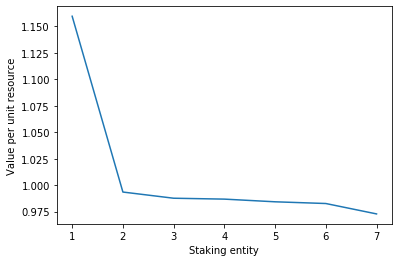

In [26]:
plt.plot(x_axis,value_per_unit_resource)
plt.xlabel("Staking entity")
plt.ylabel("Value per unit resource")

print("The below graph displays the value per unit of resource of current staking entities: big miners and the ocean. 1 represents the largest staker, 6 the smallest and 7 represents the ocean.")

Hence, the results clearly reveal that: Higher the resource, higher the value per unit resource which is consistent with the findings of [2]

## Limitations of the Notebook

1) We make an assumption that among 163400 the number of deactivated validators are minimal and are negligible. In reality there have been about 140 validators who have successfully exited and another 140 who have been slashed. Thus they make up close to 0.17% of the total population of the validators we've considered

2) In this notebook, we classify "entities" based on their Eth1 address. In reality however it can be possible that a single entity can make deposits with more than one wallet address. The logical next step to this analysis is to identify the all the addresses that belong to a single entity and further aggregate them. We will do so in the susiquent notebooks.

## References 

[1] Milnor, J.W., Shapley, L.S.: Values of Large Games II: Oceanic Games. Mathematics of Operations Research 3(4), 290–307 (1978).https://doi.org/10.1287/moor.3.4.290

[2] Leonardos, Nikos, Leonardos, Stefanos, Piliouras Georgios: Oceanic Games: Centralization Risks and Incentives in Blockchain Mining. International Conference on Mathematical Research for Blockchain Economy (MARBLE 2019), Santorini, Greece. [Best Paper Award]. https://arxiv.org/abs/1904.02368

[3] Aumann, R.J.: Markets with a Continuum of Traders. Econometrica 32(1/2), 39–50 (1964)

[4] Shapiro, N.Z., Shapley, L.S.: Values of Large Games, I: A Limit Theorem. Mathematics of Operations Research 3(1), 1–9 (1978).https://doi.org/10.1287/moor.3.1.1

[5] Shitovitz, B.: Oligopoly in Markets with a Continuum of Traders. Econometrica 41(3), 467–501 (1973)

## Acknowledgements 

A huge thank you to [Barnabé Monnot](https://twitter.com/barnabemonnot?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) for all his very valuable insights and suggestions and his continued support for Beacon Digest. 

Another huge thank you to Stefanos Leonardos and Georgios Piliouras for intriducing me to the idea of Oceanic Games and its applications in Blockchains. 

I'd also like to express my gratitude to the team at The University of Warwick for making their software [ssocean](https://homepages.warwick.ac.uk/~ecaae/ssocean.html) free and open source